In [104]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [105]:
data = '/content/full_data.csv'

df = pd.read_csv(data)

In [106]:
df.shape

(4804, 4)

In [107]:
df.head()

,Settlement,Main_Dmg,X,Y
0,Ait Othmane,Possible damage,-8.40655,31.16093
1,Ait Othmane,Damage,-8.40728,31.15985
2,Ait Othmane,Damage,-8.40648,31.16065
3,Ait Othmane,Damage,-8.40631,31.16064
4,Ait Othmane,Possible damage,-8.40649,31.16052


In [108]:
col_names = df.columns

col_names

Index(['Settlement', 'Main_Dmg', 'X', 'Y'], dtype='object')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Settlement  4804 non-null   object 
 1   Main_Dmg    4804 non-null   object 
 2   X           4804 non-null   float64
 3   Y           4804 non-null   float64
dtypes: float64(2), object(2)
memory usage: 150.2+ KB


In [110]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

df[categorical].head()

There are 2 categorical variables

The categorical variables are : ['Settlement', 'Main_Dmg']


,Settlement,Main_Dmg
0,Ait Othmane,Possible damage
1,Ait Othmane,Damage
2,Ait Othmane,Damage
3,Ait Othmane,Damage
4,Ait Othmane,Possible damage


In [111]:
df[categorical].isnull().sum()

Settlement    0
Main_Dmg      0
dtype: int64

In [112]:

for var in categorical:

    print(df[var].value_counts())

Adebdi          2575
Taroudan         617
Ait Othmane      606
ADASSIL          488
Chichaoua        271
Lalla Aaziza     170
Marrakesh         77
Name: Settlement, dtype: int64
Damage             3114
Possible damage    1690
Name: Main_Dmg, dtype: int64


In [113]:
# view frequency distribution of categorical variables

for var in categorical:

    print(df[var].value_counts()/np.float(len(df)))

Adebdi          0.536012
Taroudan        0.128435
Ait Othmane     0.126145
ADASSIL         0.101582
Chichaoua       0.056411
Lalla Aaziza    0.035387
Marrakesh       0.016028
Name: Settlement, dtype: float64
Damage             0.64821
Possible damage    0.35179
Name: Main_Dmg, dtype: float64


<ipython-input-113-7f6212493c0c>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))
<ipython-input-113-7f6212493c0c>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))


In [114]:
for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

Settlement  contains  7  labels
Main_Dmg  contains  2  labels


In [115]:
df['Settlement'].unique()

array(['Ait Othmane', 'Adebdi', 'Chichaoua', 'Lalla Aaziza', 'ADASSIL',
       'Taroudan', 'Marrakesh'], dtype=object)

In [116]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

df[numerical].head()

There are 2 numerical variables

The numerical variables are : ['X', 'Y']


,X,Y
0,-8.40655,31.16093
1,-8.40728,31.15985
2,-8.40648,31.16065
3,-8.40631,31.16064
4,-8.40649,31.16052


Text(0, 0.5, 'Y')

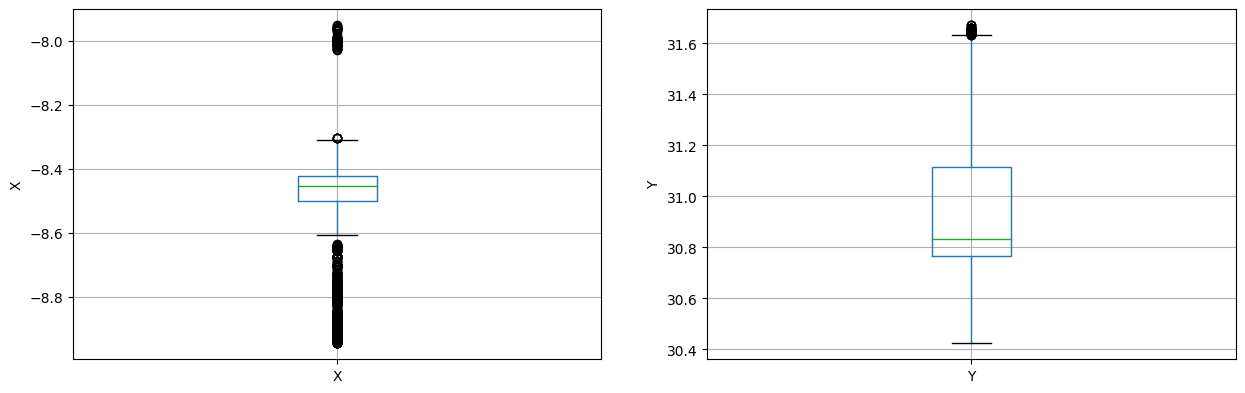

In [117]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='X')
fig.set_title('')
fig.set_ylabel('X')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Y')
fig.set_title('')
fig.set_ylabel('Y')

Text(0, 0.5, 'Y')

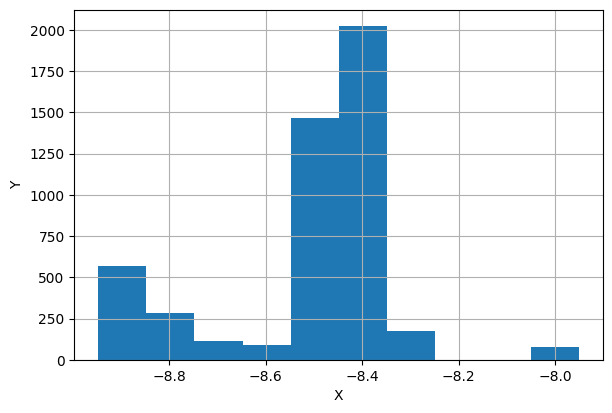

In [118]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.X.hist(bins=10)
fig.set_xlabel('X')
fig.set_ylabel('Y')

In [119]:
duplicate = df[df.duplicated()]              # check duplicate values


In [120]:
duplicate.shape

(0, 4)

In [121]:
df.isnull().sum()

Settlement    0
Main_Dmg      0
X             0
Y             0
dtype: int64

<Axes: xlabel='Main_Dmg', ylabel='count'>

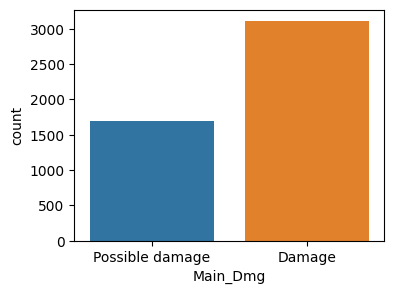

In [122]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Main_Dmg', data=df)

<Axes: xlabel='count', ylabel='Settlement'>

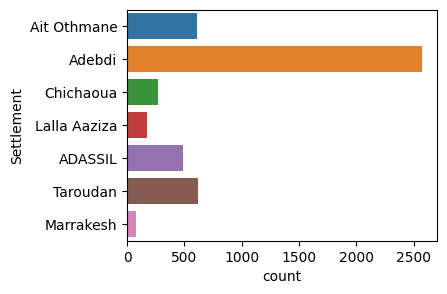

In [123]:
plt.figure(figsize=(4, 3))
sns.countplot(y='Settlement', data=df)

In [124]:
df=df.replace({'Settlement':{'Marrakesh':0, 'Taroudan':1,'ADASSIL':2, 'Lalla Aaziza':3,'Chichaoua':4,'Adebdi':5,'Ait Othmane':6}})

#Declare feature vector and target variable

In [125]:
X = df.drop(['Main_Dmg'], axis=1)

y = df['Main_Dmg']

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [127]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((4323, 3), (481, 3))

In [128]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [129]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['Damage', 'Damage', 'Damage', 'Damage', 'Damage', 'Damage',
       'Damage', 'Damage', 'Damage', 'Damage', 'Damage', 'Damage',
       'Damage', 'Damage', 'Damage', 'Damage', 'Damage', 'Damage',
       'Damage', 'Possible damage', 'Damage', 'Damage', 'Damage',
       'Damage', 'Damage', 'Damage', 'Damage', 'Damage', 'Damage',
       'Possible damage', 'Damage', 'Damage', 'Damage', 'Damage',
       'Damage', 'Damage', 'Damage', 'Damage', 'Damage', 'Damage',
       'Damage', 'Damage', 'Damage', 'Damage', 'Damage', 'Damage',
       'Possible damage', 'Damage', 'Damage', 'Damage', 'Damage',
       'Damage', 'Possible damage', 'Damage', 'Damage', 'Damage',
       'Damage', 'Possible damage', 'Damage', 'Damage', 'Damage',
       'Damage', 'Damage', 'Damage', 'Possible damage', 'Damage',
       'Damage', 'Damage', 'Damage', 'Damage', 'Possible damage',
       'Damage', 'Damage', 'Damage', 'Damage', 'Damage', 'Damage',
       'Possible damage', 'Damage', 'Damage', 'Damage', 'Damage',
   

In [130]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.6611


In [131]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['Damage', 'Damage', 'Possible damage', ..., 'Damage', 'Damage',
       'Damage'], dtype=object)

In [132]:
y_train

1324             Damage
3883             Damage
4711    Possible damage
3314    Possible damage
3034             Damage
             ...       
1033             Damage
3264    Possible damage
1653             Damage
2607             Damage
2732             Damage
Name: Main_Dmg, Length: 4323, dtype: object

#Check for overfitting and underfitting

In [133]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.6657
Test set score: 0.6611


In [134]:
# check class distribution in test set

y_test.value_counts()

Damage             313
Possible damage    168
Name: Main_Dmg, dtype: int64

<Axes: >

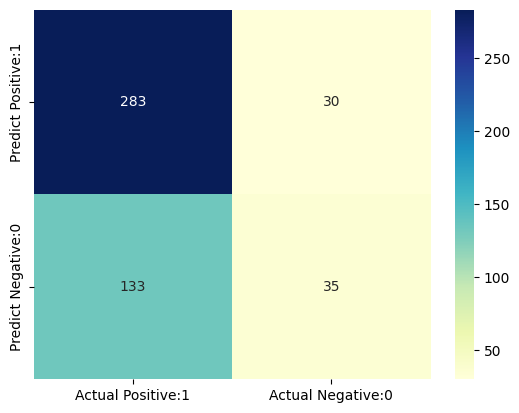

In [135]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#Classification Report

In [136]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

                 precision    recall  f1-score   support

         Damage       0.68      0.90      0.78       313
Possible damage       0.54      0.21      0.30       168

       accuracy                           0.66       481
      macro avg       0.61      0.56      0.54       481
   weighted avg       0.63      0.66      0.61       481



#Error classification

In [137]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [138]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.3389


In [139]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9042


In [140]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.6803


In [141]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.6803


In [142]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4615


In [143]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5385


In [144]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.70004407, 0.29995593],
       [0.58580472, 0.41419528],
       [0.70367648, 0.29632352],
       [0.70247544, 0.29752456],
       [0.75025191, 0.24974809],
       [0.70028285, 0.29971715],
       [0.70239662, 0.29760338],
       [0.70322366, 0.29677634],
       [0.70222301, 0.29777699],
       [0.70303055, 0.29696945]])

In [145]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.64739884 0.67861272 0.65433526 0.66203704 0.67361111]


In [146]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.6632


In [147]:
!pip install catboost


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import collections

In [150]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "CatBoost": CatBoostClassifier()
}

In [151]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Streaming output truncated to the last 5000 lines.
5:	learn: 0.6728615	total: 11.6ms	remaining: 1.91s
6:	learn: 0.6697342	total: 14.1ms	remaining: 2s
7:	learn: 0.6670262	total: 16ms	remaining: 1.98s
8:	learn: 0.6643340	total: 17.6ms	remaining: 1.94s
9:	learn: 0.6619741	total: 19.2ms	remaining: 1.9s
10:	learn: 0.6591677	total: 20.9ms	remaining: 1.88s
11:	learn: 0.6561263	total: 22.7ms	remaining: 1.87s
12:	learn: 0.6536053	total: 24.5ms	remaining: 1.86s
13:	learn: 0.6512254	total: 26.3ms	remaining: 1.85s
14:	learn: 0.6489254	total: 28.1ms	remaining: 1.84s
15:	learn: 0.6463130	total: 29.9ms	remaining: 1.84s
16:	learn: 0.6441652	total: 31.6ms	remaining: 1.83s
17:	learn: 0.6420567	total: 33.4ms	remaining: 1.82s
18:	learn: 0.6399954	total: 35.2ms	remaining: 1.81s
19:	learn: 0.6382055	total: 37ms	remaining: 1.81s
20:	learn: 0.6364589	total: 38.8ms	remaining: 1.81s
21:	learn: 0.6350431	total: 40.2ms	remaining: 1.79s
22:	learn: 0.6329420	total: 42.1ms	remaining: 1.79s
23:	learn: 0.6309279	total

In [152]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [153]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')




Logistic Regression Cross Validation Score:  68.61%
Knears Neighbors Cross Validation Score 75.09%
Support Vector Classifier Cross Validation Score 65.32%
DecisionTree Classifier Cross Validation Score 69.7%


In [154]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.externals import joblib
from sklearn.model_selection import cross_val_score

# Créez un modèle KNeighborsClassifier avec les meilleurs paramètres ou un modèle déjà configuré
knears_neighbors = KNeighborsClassifier(n_neighbors=5)  # Exemple : utilisez vos meilleurs paramètres ici

# Entraînez le modèle avec l'ensemble complet de données
knears_neighbors.fit(X_train, y_train)

# Enregistrez le modèle entraîné dans un fichier
# joblib.dump(knears_neighbors, 'knears_neighbors_model.joblib')


KNeighborsClassifier()

In [165]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision tree:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
                 precision    recall  f1-score   support

         Damage       0.71      0.93      0.81       313
Possible damage       0.69      0.30      0.42       168

       accuracy                           0.71       481
      macro avg       0.70      0.61      0.61       481
   weighted avg       0.71      0.71      0.67       481

KNears Neighbors:
                 precision    recall  f1-score   support

         Damage       0.80      0.88      0.84       313
Possible damage       0.73      0.60      0.66       168

       accuracy                           0.78       481
      macro avg       0.77      0.74      0.75       481
   weighted avg       0.78      0.78      0.78       481

Support Vector Classifier:
                 precision    recall  f1-score   support

         Damage       0.73      0.78      0.75       313
Possible damage       0.53      0.45      0.49       168

       accuracy                           0.67       481
      macro av

In [156]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [157]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.6833


Parameters that give the best results : 

 {'C': 100}


Estimator that was chosen by the search : 

 LogisticRegression(C=100, random_state=0, solver='liblinear')


In [159]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.6902


In [160]:
from joblib import dump
# Enregistrement du modèle
dump(knears_neighbors, 'knn_model.h5')


['knn_model.h5']

In [162]:
y_test

2501             Damage
3526             Damage
942     Possible damage
2735             Damage
130              Damage
             ...       
4111             Damage
4762    Possible damage
1804             Damage
720     Possible damage
661              Damage
Name: Main_Dmg, Length: 481, dtype: object

In [161]:
y_pred_test = knears_neighbors.predict(X_test)

y_pred_test

array(['Damage', 'Damage', 'Damage', 'Damage', 'Damage',
       'Possible damage', 'Possible damage', 'Possible damage', 'Damage',
       'Damage', 'Possible damage', 'Damage', 'Damage', 'Damage',
       'Damage', 'Damage', 'Possible damage', 'Possible damage', 'Damage',
       'Possible damage', 'Damage', 'Possible damage', 'Damage', 'Damage',
       'Damage', 'Damage', 'Damage', 'Damage', 'Possible damage',
       'Possible damage', 'Possible damage', 'Possible damage', 'Damage',
       'Possible damage', 'Damage', 'Damage', 'Damage', 'Damage',
       'Damage', 'Damage', 'Damage', 'Damage', 'Damage', 'Damage',
       'Damage', 'Damage', 'Possible damage', 'Possible damage', 'Damage',
       'Damage', 'Damage', 'Possible damage', 'Possible damage',
       'Possible damage', 'Damage', 'Damage', 'Damage', 'Possible damage',
       'Damage', 'Damage', 'Damage', 'Damage', 'Possible damage',
       'Damage', 'Possible damage', 'Damage', 'Possible damage', 'Damage',
       'Possible damage'

In [163]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7568


<Axes: >

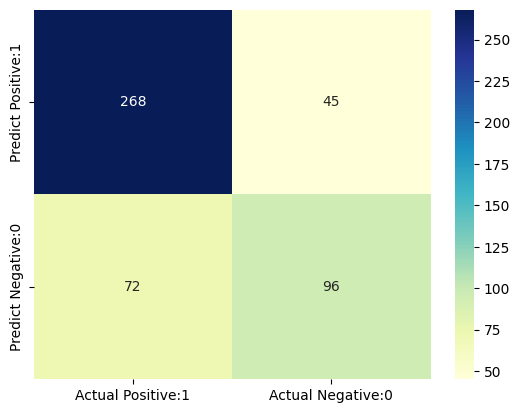

In [164]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [166]:
data = pd.read_csv('/content/Dep1.csv')

In [167]:
X1 = data.drop(['Main_Dmg'], axis=1)



In [169]:
X1=X1.replace({'Settlement':{'Marrakesh':0, 'Taroudan':1,'ADASSIL':2, 'Lalla Aaziza':3,'Chichaoua':4,'Adebdi':5,'Ait Othmane':6}})

In [171]:
y_pred1 = knears_neighbors.predict(X1)

y_pred1[:10]

array(['Damage', 'Damage', 'Damage', 'Damage', 'Damage',
       'Possible damage', 'Possible damage', 'Damage', 'Damage',
       'Possible damage'], dtype=object)